<a href="https://colab.research.google.com/github/Taikatou/economy_research/blob/master/Analytics/active_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Input, Concatenate
from keras import Model
from tensorflow import keras

In [2]:
import os
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
opt = keras.optimizers.Adam()

In [4]:
type_path = "E:\TestData"
game_play_data = { }
hash_data = {}
environments = {}

In [8]:
level_cap = 5
configuration_data = {}
graph_data = { }

for filename in os.listdir(type_path):
    file_path = os.path.join(type_path, filename)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        if "level_selection" in file_path:
            if filename not in hash_data:
                hash_data[filename] = []
                environments[filename] = {}
            for i in range(len(df)):
                battle_environment = df.loc[i, 'BattleEnvironment']
                battle_id = df.loc[i, 'ID']
                if battle_environment not in environments:
                    environments[filename][battle_environment] = [0, 0, 0, 0, 0]
                if battle_id not in hash_data:
                    level = df.loc[i, 'Level']
                    environments[filename][battle_environment][level] = environments[filename][battle_environment][level] + 1
                    hash_data[filename].append(battle_id)
        elif "level_configuration" in filename:
            for i in range(len(df)):
              config = df.iloc[i].values.tolist()
              print(config)
              configuration_data[config[0]] = config[1:]
              configuration_data["1"] = config[1:]
        else:
            file_id = filename.split('_', 1)[1].split(".")[0]
            if file_id not in game_play_data:
                game_play_data[file_id] = {
                    "Brawler": [[], [], [], [], []],
                    "Mage": [[], [], [], [], []],
                    "Swordsman": [[], [], [], [], []]
                }
                graph_data[file_id] = {}
            adventurer_type = filename.split('_')[0]
            for i in range(len(df)):
                level = df.loc[i, 'Level']
                max_steps = df.loc[i, 'MaxCount']
                game_play_data[file_id][adventurer_type][level-1].append(max_steps)
            for key in game_play_data[file_id]:
                graph_data[file_id][key] = [[], [], [], [], []]
                for x in range(level_cap):
                    if len(game_play_data[file_id][key][x]) > 0:
                        graph_data[file_id][key][x] = mean(game_play_data[file_id][key][x])

['02/08/2022 00:32:31', 0.2001211, 0.1932651, 0.2002864]


In [9]:
print(configuration_data)
print(game_play_data)

{'02/08/2022 00:32:31': [0.2001211, 0.1932651, 0.2002864], '1': [0.2001211, 0.1932651, 0.2002864]}
{'1_02_08_2022_00_49.csv': {'Brawler': [[494, 1047, 1453, 9190, 11785, 12378, 14560, 20776, 20776, 378, 2840], [8829, 15548, 18060, 19795, 19863, 20417, 21139, 21762, 27576, 3054, 4660], [10534, 22181, 26814, 30327, 35099, 41009, 46389, 56164, 58369, 7926, 15190], [36723, 46389, 51863, 63547, 76626, 79677, 2328, 3964, 4257, 31775], [77339, 0, 18269, 0, 19783, 0]], 'Mage': [[1047, 2421, 4761, 9582, 12314, 12378, 13874, 14215, 15548, 29136, 5459, 3059, 1257, 5753, 9741], [4761, 9582, 13874, 19863, 20048, 21762, 27576, 32346, 34697, 39390, 1824, 3822, 8304, 6158, 15069, 3981, 9700], [14972, 22181, 29438, 34003, 36526, 38597, 42255, 46185, 51452, 59778, 7144, 6109, 14623, 9981, 20300, 26389], [26814, 37148, 49177, 61420, 70537, 72693, 72862, 73056, 76508, 80176, 29185], [75654, 0, 11982, 0, 13945, 0, 15614, 0, 17416, 0, 27051, 0, 28016, 0, 35498, 0]], 'Swordsman': [[494, 1453, 2421, 6915, 991

In [10]:
print(graph_data)

{'1_02_08_2022_00_49': {'Brawler': [8697, 16427, 31818, 39714, 19231], 'Mage': [9369, 16044, 28745, 59052, 14073], 'Swordsman': [6325, 11097, 26855, 43827, 12466]}}


In [8]:
print(config)

['02/08/2022 00:32:31', 0.2001211, 0.1932651, 0.2002864]


In [15]:
reviews = { "02/08/2022 00:32:31": [0, 0, 1], "Test2": [0, 0, 1] }
from sklearn.model_selection import train_test_split
y = list(reviews.keys())
labels = []
labeled_config = []

for key in y:
    if key in graph_data:
        data = graph_data[k].values()
        labeled_config.append(data)
        labels.append(reviews[key])
        

unlabeled_data = []
for key in configuration_data:
  if key not in y:
    data = configuration_data[key]
    unlabeled_data.append(data)

In [16]:
print(labeled_config)
print(config[0])
config = [config, config]
print(labels)
labels.append(labels[0])
print(unlabeled_data)

[]
['02/08/2022 00:32:31', 0.2001211, 0.1932651, 0.2002864]
[]


IndexError: list index out of range

In [11]:
label_data = [labeled_config[0], labeled_config[0]]
print(labels)

[[0, 0, 1], [0, 0, 1]]


In [12]:
train_data, train_labels, val_data, val_labels = train_test_split(label_data, labels, test_size=0.1)

In [13]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["categorical_accuracy"]
    val_accuracy = val_accuracy + history.history["val_categorical_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [14]:
import tensorflow as tf

In [15]:
def make_model():
  x = Input(shape=(3,), name="Game Play Data")

  g = Dense(500, activation='relu')(x)
  g = Dense(100, activation='relu')(g)
  g = Dense(50, activation='relu')(g)
  g = Dense(3, activation='softmax')(g)
  model = Model(inputs=x, outputs=g)
  return model

In [16]:
print(train_data)

[[0.2001211, 0.1932651, 0.2002864]]


In [17]:
num_iterations=3
sampling_size=5000
# inspired from this https://keras.io/examples/nlp/active_learning_review_classification/
model = make_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=[
          keras.metrics.CategoricalAccuracy(),
          keras.metrics.FalseNegatives(),
          keras.metrics.FalsePositives(),
      ],)
losses, val_losses, accuracies, val_accuracies = [], [], [], []

# Defining checkpoints.
# The checkpoint callback is reused throughout the training since it only saves the best overall model.
checkpoint = keras.callbacks.ModelCheckpoint(
    "AL_Model.h5", save_best_only=True, verbose=1
)
# Here, patience is set to 4. This can be set higher if desired.
early_stopping = keras.callbacks.EarlyStopping(patience=4, verbose=1)

print(f"Starting to train with {len(train_data)} samples")
# Initial fit with a small subset of the training set
history = model.fit(
    x=train_data,
    y=train_labels,
    epochs=20,
    validation_data=(val_data, val_labels),
    callbacks=[checkpoint, early_stopping],
)

# Appending history
losses, val_losses, accuracies, val_accuracies = append_history(
    losses, val_losses, accuracies, val_accuracies, history
)

Starting to train with 1 samples
Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6521 - categorical_accuracy: 0.0000e+00 - false_negatives: 3.0000 - false_positives: 0.0000e+00 - val_loss: 1.1027 - val_categorical_accuracy: 0.0000e+00 - val_false_negatives: 1.0000 - val_false_positives: 0.0000e+00

Epoch 00001: val_loss improved from inf to 1.10271, saving model to AL_Model.h5
Epoch 2/20
1/1 [==============================] - 0s 26ms/step - loss: 0.6522 - categorical_accuracy: 0.0000e+00 - false_negatives: 3.0000 - false_positives: 0.0000e+00 - val_loss: 1.1160 - val_categorical_accuracy: 0.0000e+00 - val_false_negatives: 1.0000 - val_false_positives: 0.0000e+00

Epoch 00002: val_loss did not improve from 1.10271
Epoch 3/20
1/1 [==============================] - 0s 27ms/step - loss: 0.6523 - categorical_accuracy: 0.0000e+00 - false_negatives: 3.0000 - false_positives: 0.0000e+00 - val_loss: 1.1341 - val_categorical_accuracy: 0.0000e+00 - val_false_negatives: 1.00

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def draw_graph():
  labels = ['1', '2', '3', '4', '5']
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, graph_data["Brawler"], width, label="Brawler")
  rects2 = ax.bar(x, graph_data["Mage"], width, label="Mage")
  rects3 = ax.bar(x + width/2, graph_data["Swordsman"], width, label="Swordsman")

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Time Steps')
  ax.set_title('Time Steps To Next Level')
  ax.set_xticks(x, labels)
  ax.legend()

  fig.tight_layout()

  plt.show()

In [21]:
def ask_question(adventurer_type):
  return input ("On a scale of 1-5, how difficult progress is with the {adventurer_type} character compared to other playable characters\nwith 1 (unfair) too challenging, 3 fair, and 5 (unfair) too easy.")

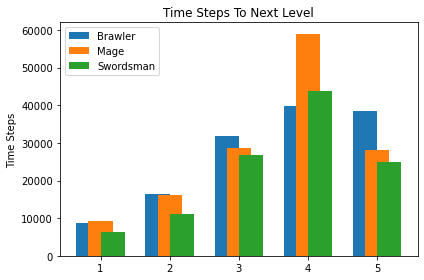

KeyboardInterrupt: Interrupted by user

In [22]:
used = []
label_al = labels
label_data_al = label_data
for iteration in range(num_iterations):
  # Getting predictions from previously trained model
  predictions = model.predict(unlabeled_data)
  length = min(len(predictions), 10)
  minValue = 1
  index = -1
  for x in range(length):
    if x not in used:
      predict = predictions[x]
      maxValue = max(predict)
      if maxValue < minValue:
        minValue = maxValue
        index = x
  if index != 1:
    used.append(index)
    draw_graph()
    num = ask_question("Swordsman")
    mage = ask_question("Mage")
    brawler = ask_question("Mage")
    v = int(num) - 1
    one_hot = [0, 0, 0]
    one_hot[v] = 1
    d = unlabeled_data[index]
    label_data_al.append(d)
    label_al.append(one_hot)
  print(len(label_data_al))
  print(len(label_al))
  

  al_train_data, al_val_data, al_train_labels, al_val_labels = train_test_split(label_data_al, label_al, test_size=0.1)
  print(len(al_train_data))
  print(len(al_train_labels))

  print(len(al_val_data))
  print(len(al_val_labels))

  # We recompile the model to reset the optimizer states and retrain the model
  model.compile(
      loss="categorical_crossentropy",
      optimizer="rmsprop",
      metrics=[
          keras.metrics.CategoricalAccuracy(),
          keras.metrics.FalseNegatives(),
          keras.metrics.FalsePositives(),
      ],
  )
  history = model.fit(
      x=al_train_data,
      y=al_train_labels,
      validation_data=(al_val_data, al_val_labels),
      epochs=20
  )

  # Appending the history
  losses, val_losses, accuracies, val_accuracies = append_history(
      losses, val_losses, accuracies, val_accuracies, history
  )

  # Loading the best model from this training loop
  model = keras.models.load_model("AL_Model.h5")

In [ ]:
# Plotting the overall history and evaluating the final model
  plot_history(losses, val_losses, accuracies, val_accuracies)
  print("-" * 100)
  print(
      "Test set evaluation: ",
      model.evaluate(test_dataset, verbose=0, return_dict=True),
  )
  print("-" * 100)

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)